<a href="https://colab.research.google.com/github/RashmithaEttadi/DataScienceProject/blob/main/PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis for Zone 1 using Linear Regression:


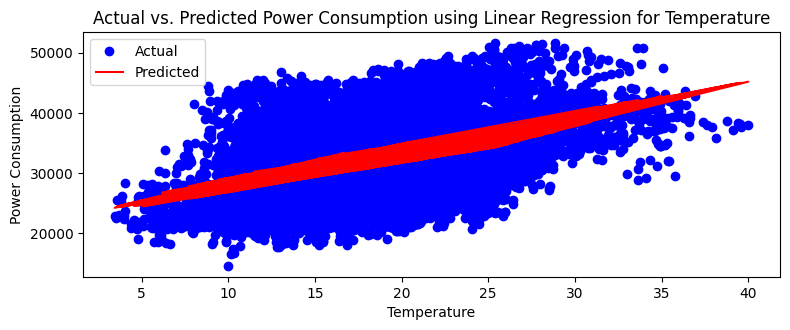

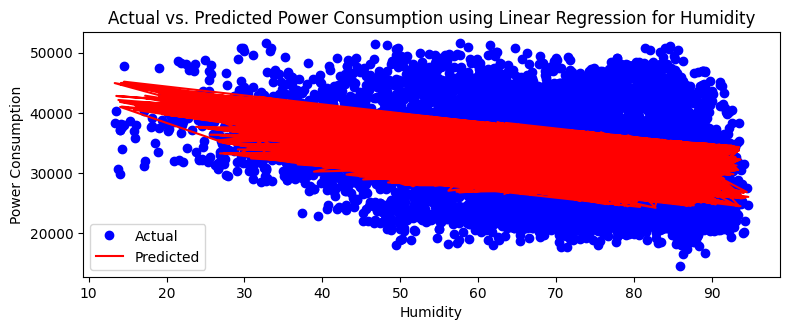

Analysis for Zone 1 using Neural Network Regression:


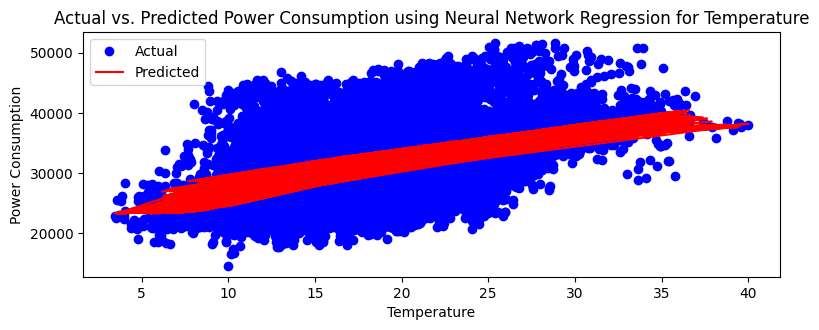

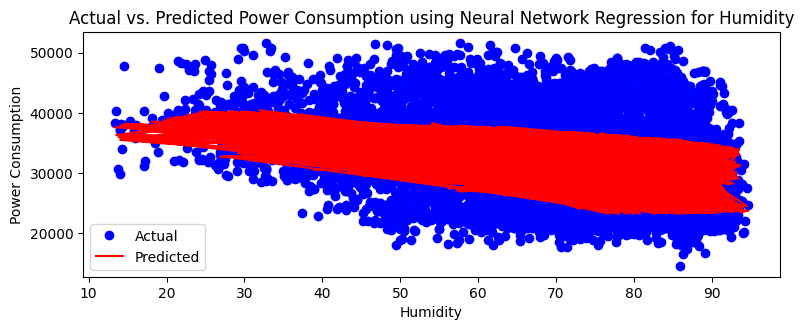

Analysis for Zone 1 using Random Forest Regression:


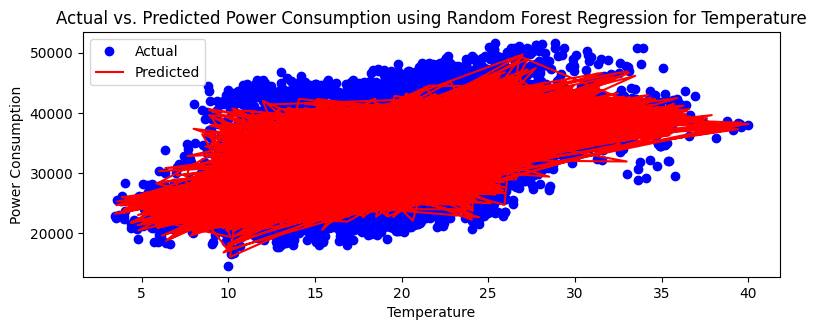

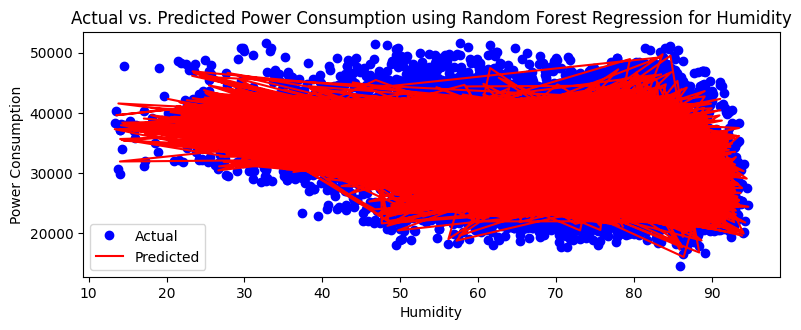

Analysis for Zone 2 using Linear Regression:


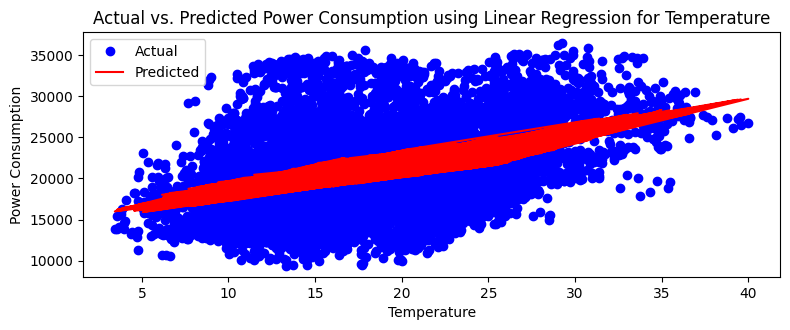

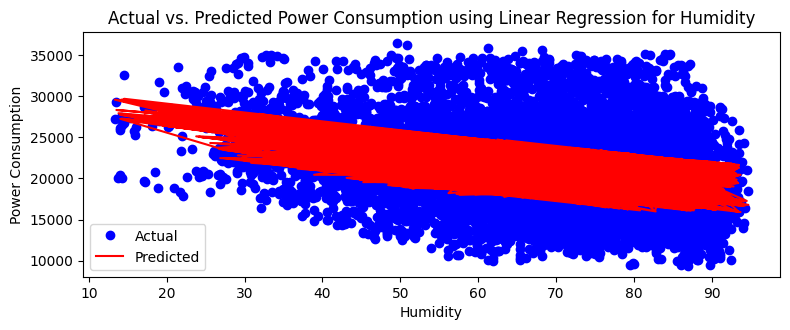

Analysis for Zone 2 using Neural Network Regression:


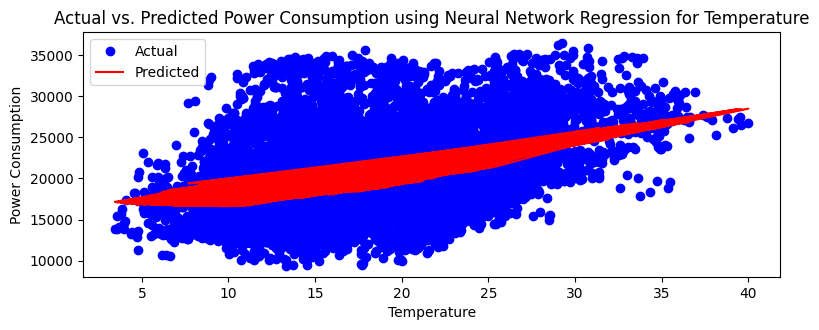

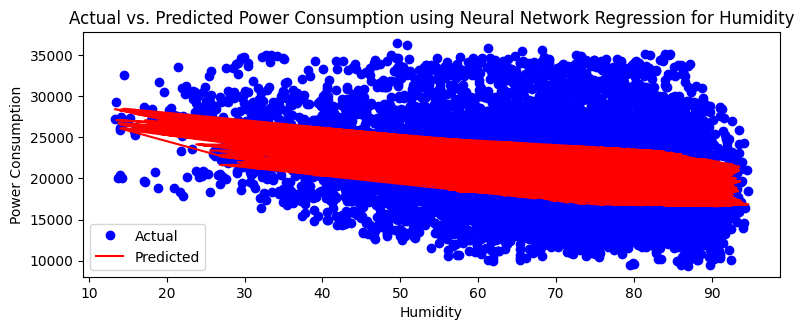

Analysis for Zone 2 using Random Forest Regression:


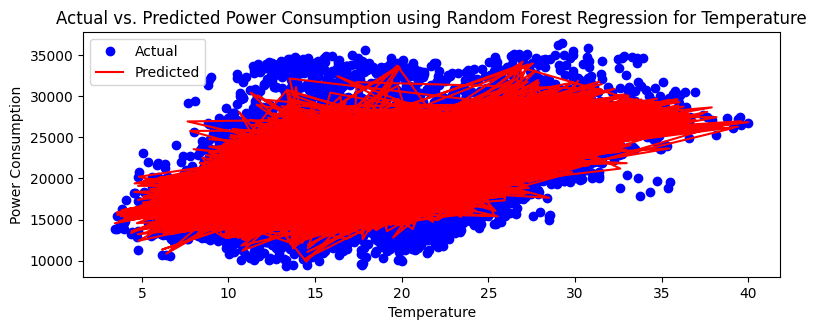

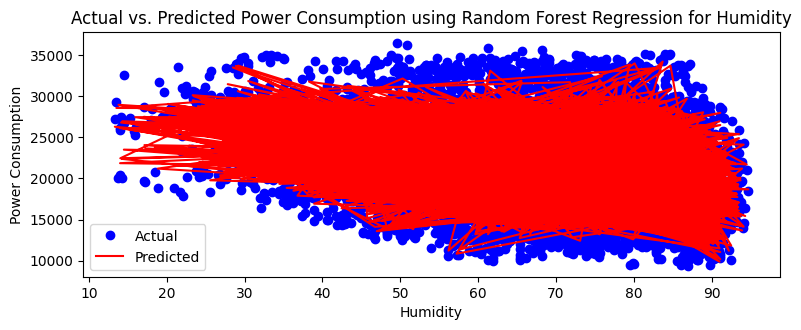

Analysis for Zone 3 using Linear Regression:


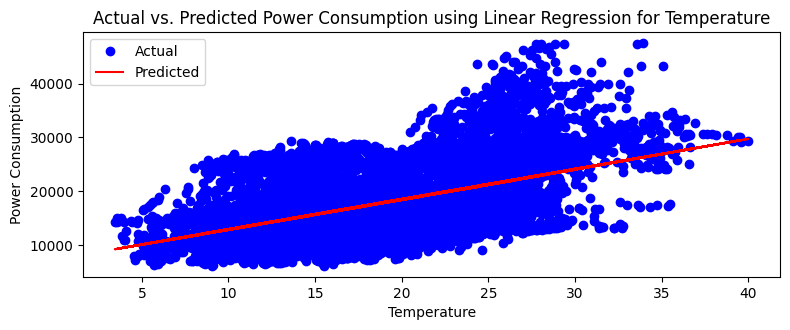

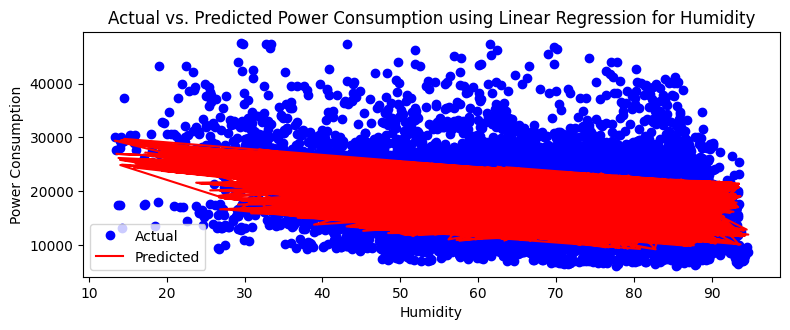

Analysis for Zone 3 using Neural Network Regression:


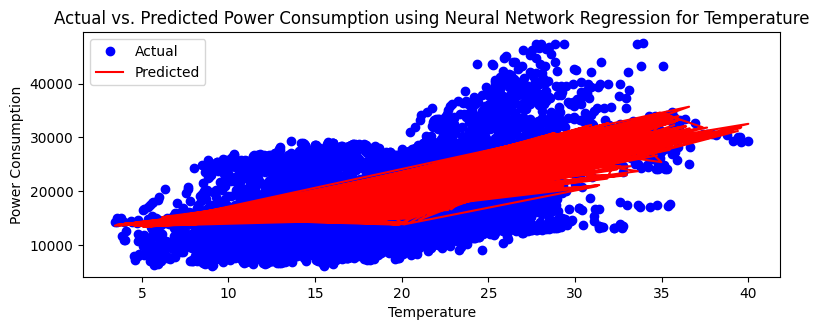

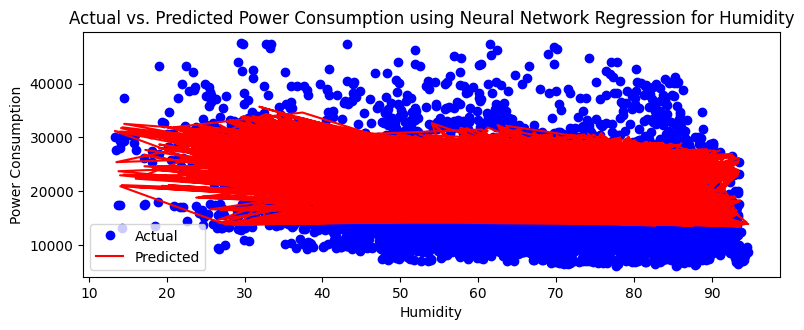

Analysis for Zone 3 using Random Forest Regression:


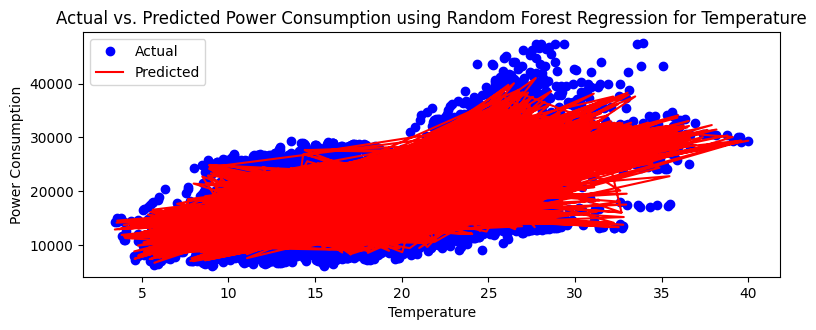

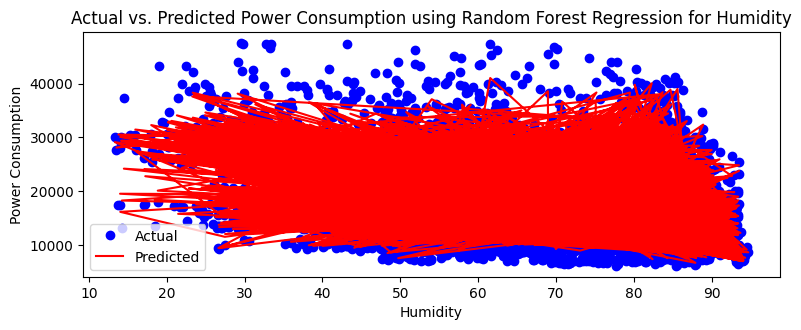

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('Tetuan_City_power_consumption.csv')

# Selecting features (temperature and humidity) and target variables (power consumption) for each zone
features = ['Temperature', 'Humidity']
target_zone1 = 'Zone 1 Power Consumption'
target_zone2 = 'Zone 2  Power Consumption'
target_zone3 = 'Zone 3  Power Consumption'

# Function to train and visualize regression models
def train_and_visualize_model(X_train, X_test, y_train, y_test, model, model_name, feature_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Visualize actual vs. predicted power consumption for temperature
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.plot(X_test[feature_name], y_test, 'bo', label='Actual')
    plt.plot(X_test[feature_name], y_pred, 'r-', label='Predicted')
    plt.xlabel(feature_name)
    plt.ylabel('Power Consumption')
    plt.title(f'Actual vs. Predicted Power Consumption using {model_name} for {feature_name}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Splitting the data for each zone and performing analysis
for zone, target in zip(['Zone 1', 'Zone 2', 'Zone 3'], [target_zone1, target_zone2, target_zone3]):
    # Selecting features and target variable for the current zone
    X = data[features]
    y = data[target]

    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr_model = LinearRegression()
    print(f"Analysis for {zone} using Linear Regression:")
    train_and_visualize_model(X_train, X_test, y_train, y_test, lr_model, 'Linear Regression', 'Temperature')
    train_and_visualize_model(X_train, X_test, y_train, y_test, lr_model, 'Linear Regression', 'Humidity')

    # Neural Network Regression
    nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
    print(f"Analysis for {zone} using Neural Network Regression:")
    train_and_visualize_model(X_train, X_test, y_train, y_test, nn_model, 'Neural Network Regression', 'Temperature')
    train_and_visualize_model(X_train, X_test, y_train, y_test, nn_model, 'Neural Network Regression', 'Humidity')

    # Random Forest Regression
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    print(f"Analysis for {zone} using Random Forest Regression:")
    train_and_visualize_model(X_train, X_test, y_train, y_test, rf_model, 'Random Forest Regression', 'Temperature')
    train_and_visualize_model(X_train, X_test, y_train, y_test, rf_model, 'Random Forest Regression', 'Humidity')
